Question 1
A little introductory brain teaser. Which is more probable when rolling 2 six-sided dice: rolling snake eyes (two ones) or rolling sevens (dice sum to seven)? What is the ratio of the probabilities?

For this question, I think explain it using statistics is more clear and easier to solve it by programming.
Rolling snmake eyes (two eyes): get a one from a dice $^1/_6$. For snake eyes, the only event we can get is rolling two dice of 1. As a result, the probability is $^1/_6$ $\times$ $^1/_6$ = $^1/_36$.
For rolling sevens, there are 6 cases.
First dice is：1 2 3 4 5 6

Second dice is:6 5 4 3 2 1

There is a total of 36 cases. So the probability of sevens is $^6/36$ = $^1/6$

2) Following what we did in class show how to use the convolution operator to determine the probability of the sum of 2 six sided dice. Do both analytically (math & counting) and numerically (computer program). Beware the implicit definition of the values (x-axis on histogram).


Using Math, simply list all the possiblities
<table>
  <thead>
    <tr>
      <th>Sum</th>
      <th>Probablity</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>1</td>
      <td>0</td>
    </tr>
    <tr>
      <td>2</td>
      <td>$^1/_36$</td>
    </tr>
     <tr>
      <td>3</td>
      <td>$^2/_36$</td>
    </tr>
      <tr>
      <td>3</td>
      <td>$^2/_36$</td>
    </tr>
      <tr>
      <td>4</td>
      <td>$^3/_36$</td>
    </tr>
      <tr>
      <td>5</td>
      <td>$^4/_36$</td>
    </tr>
      <tr>
      <td>6</td>
      <td>$^5/_36$</td>
    </tr>
      <tr>
      <td>7</td>
      <td>$^6/_36$</td>
    </tr>
      <tr>
      <td>8</td>
      <td>$^5/_36$</td>
    </tr>
      <tr>
      <td>9</td>
      <td>$^4/_36$</td>
    </tr>
      <tr>
      <td>10</td>
      <td>$^3/_36$</td>
    </tr>
     <tr>
      <td>11</td>
      <td>$^2/_36$</td>
    </tr>
     <tr>
      <td>12</td>
      <td>$^1/_36$</td>
    </tr>
  </tbody>
</table>


numerically (computer program).

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('font', size=20)
matplotlib.rc('figure', figsize=(18, 10))

import numpy as np
import pandas as pd
from scipy import signal

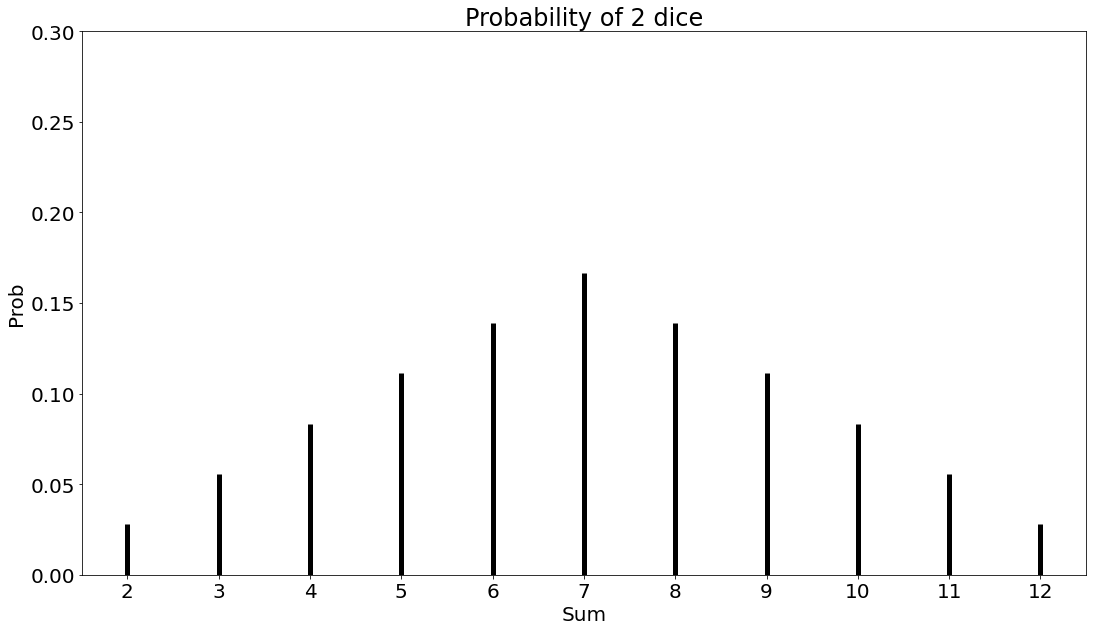

In [8]:
dice = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
sum_prob = signal.fftconvolve(dice, dice)
plt.title("Probability of 2 dice")
plt.xlabel("Sum")
plt.xticks(range(0, 13))
plt.ylabel("Prob")
plt.ylim(0, 0.3)
plt.vlines(range(2, 13), 0, sum_prob, linewidth=5);

3) Calculate the mean and the variance of the distribution in problem 2. Hint: this is surprisingly tricky, make sure your result makes sense.

When we do the calculation of the mean, we need to use the value times the probability of that value and sum them.

In [12]:
#first we calculate the varience using the formula given in class
variance = np.sum((np.arange(2, 13) - mean)* (np.arange(2, 13) - mean) * sum_prob)
# we calculate the mean using value times its probability
#the probability of each value should sum up to 1
mean = np.sum(np.arange(2, 13) * sum_prob)
print(f"mean and varience: {mean},{variance}")

mean and varience: 7.0,5.833333333333334


4) Repeat 2, and graph the average of 10 dice. Is this is a Gaussian distribution? Explain in depth.

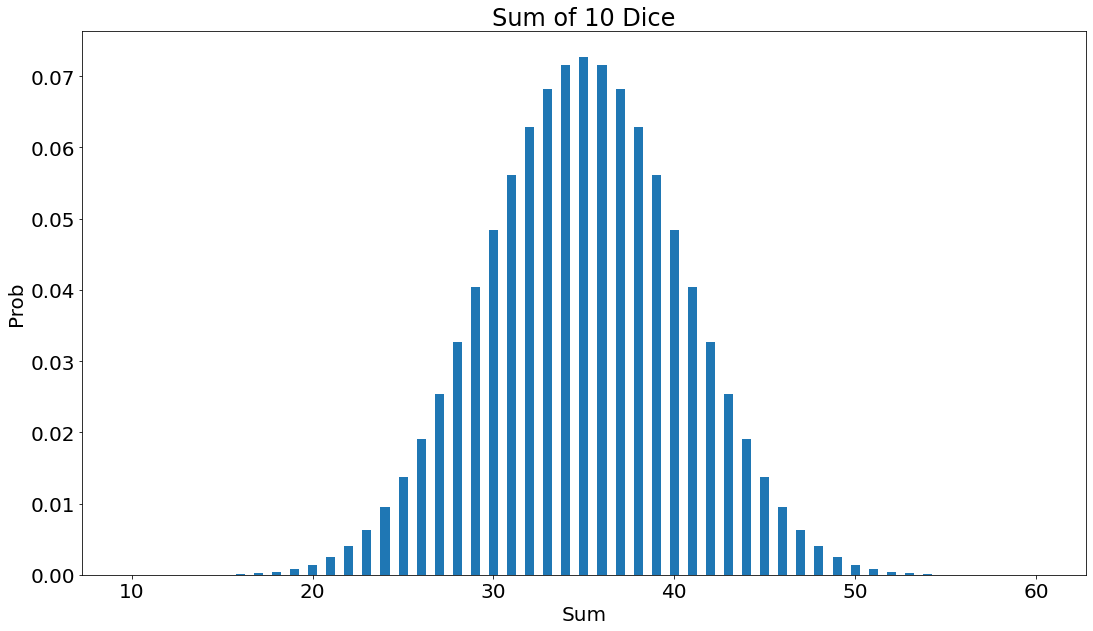

In [39]:
dice = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
#use signal.fftconvolve mentioned in the lab section
#to make the program faster
sum = signal.fftconvolve(dice, dice)
for i in range(8):
    sum = np.convolve(sum, dice)
plt.ylabel("Prob")
plt.title("Sum of 10 Dice")
plt.xlabel("Sum")
fig = plt.bar(np.arange(10,61), sum, width = 0.5)
plt.show()

It is a Gaussian distribution. The shape of it is close to a Gaussian distribution. ALso, we can use qq-plot to test if it is a normal distribution

5) Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. Explore what this means for integrating a signal over time.

-5.551115123125783e-17


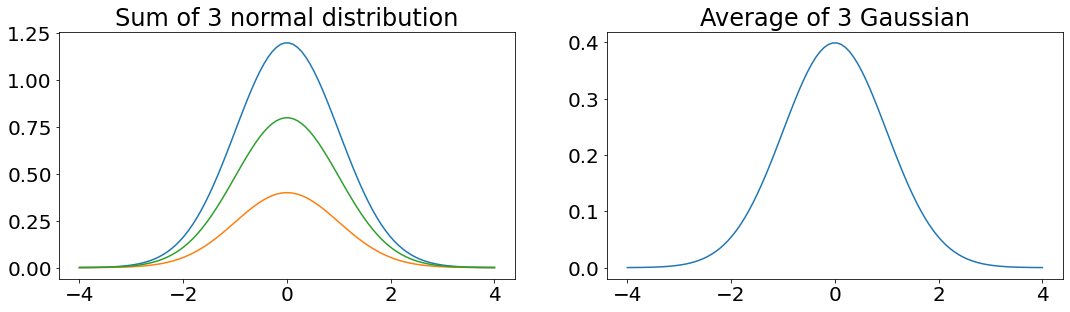

In [42]:
import statistics
from statistics import stdev
dist = stats.norm()
x = np.linspace(-4,4,100)
#plot the sum of 3 Gaussian
ax_1 = plt.subplot(2, 2, 1)
ax_1.plot(x, dist.pdf(x) + dist.pdf(x) + dist.pdf(x))
ax_1.plot(x, dist.pdf(x))
ax_1.plot(x, dist.pdf(x) + dist.pdf(x))
ax_1.set_title("Sum of 3 normal distribution")
# plot the average
ax_2 = plt.subplot(2,2,2)
ax_2.set_title("Average of 3 Gaussian")
ax_2.plot(x, (dist.pdf(x) + dist.pdf(x) + dist.pdf(x)) / 3)

dif = stdev(dist.pdf(x) + dist.pdf(x) + dist.pdf(x)) - 3 * stdev(dist.pdf(x))
print(dif)

Clearly, from the graph, the sum of Gaussian is also a Gaussian. 
From the calculation, we know that the standard deviation of a sum of Gaussians, is the sum of the standard deviation of the each.
